<a href="https://colab.research.google.com/github/zainabbas313/MACHINE-LEARNING-MODEL-TRAINING/blob/main/BREAST_CANCER_WNCONSIN_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ABOUT DATASET

The Breast Cancer Wisconsin (Diagnostic) dataset is a well-known dataset in the machine learning community. It consists of features computed from digitized images of fine needle aspirates (FNAs) of breast masses. These features describe various characteristics of the cell nuclei present in the images. Here's a detailed overview:

### Source and Reference
- The dataset is referenced in the work by K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets," published in Optimization Methods and Software, 1992.
- It is available through the UW CS ftp server and the UCI Machine Learning Repository.

### Attribute Information
1. **ID number**: A unique identifier for each observation.
2. **Diagnosis**: The target variable, which indicates whether the tumor is malignant (M) or benign (B).
3. **Features**: There are 30 real-valued features computed for each cell nucleus. These features are categorized as follows:

   **Mean values** (mean of distances from center to points on the perimeter):
   - Radius
   - Texture (standard deviation of gray-scale values)
   - Perimeter
   - Area
   - Smoothness (local variation in radius lengths)
   - Compactness (perimeter² / area - 1.0)
   - Concavity (severity of concave portions of the contour)
   - Concave points (number of concave portions of the contour)
   - Symmetry
   - Fractal dimension ("coastline approximation" - 1)

   **Standard error values**:
   - Radius SE
   - Texture SE
   - Perimeter SE
   - Area SE
   - Smoothness SE
   - Compactness SE
   - Concavity SE
   - Concave points SE
   - Symmetry SE
   - Fractal dimension SE

   **"Worst" or largest values** (mean of the three largest values):
   - Worst Radius
   - Worst Texture
   - Worst Perimeter
   - Worst Area
   - Worst Smoothness
   - Worst Compactness
   - Worst Concavity
   - Worst Concave points
   - Worst Symmetry
   - Worst Fractal dimension

### Characteristics
- **Feature Values**: All feature values are recorded with four significant digits.
- **Missing Values**: There are no missing attribute values in this dataset.
- **Class Distribution**: The dataset consists of 357 benign cases and 212 malignant cases.


# LIBRARIES

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [58]:
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LOAD DATASET

In [59]:
df = pd.read_csv('/content/drive/MyDrive/Project/MACHINE LEARNING/MACHINE LEARNING & DATA SCIENCE A-Z/DATASETS/Breast Cancer Wisconsin (Diagnostic) Data Set/data.csv')

In [60]:
df.shape

(569, 33)

In [61]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# DATA CLEANING

In [62]:
df.columns = df.columns.str.lower()

In [63]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'unnamed: 32'],
      dtype='object')


In [64]:
num_col = df.select_dtypes(['int', 'float']).columns
obj_col = df.select_dtypes('object').columns
len(num_col), len(obj_col)

(32, 1)

In [65]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [66]:
df.drop(['id'], axis = 1, inplace = True)

In [67]:
df_mean = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

df_se = df[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']]

df_worst = df[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

len(df_mean.columns), len(df_se.columns), len(df_worst.columns)

(10, 10, 10)

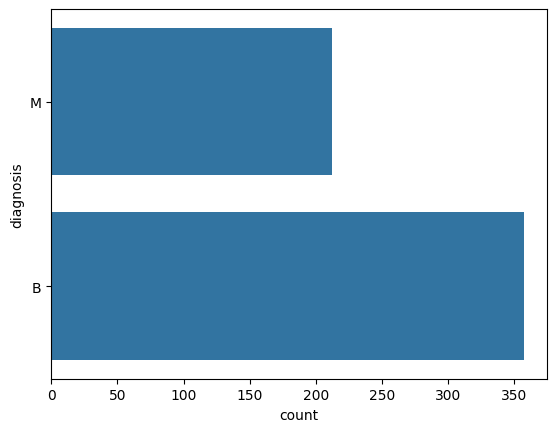

In [68]:
sns.countplot(df['diagnosis'])
plt.show()

In [69]:
print((df.diagnosis == 'M').sum())
print((df.diagnosis == 'B').sum())

212
357


In [70]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

## MEAN COLUMNS

In [71]:
df_mean.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [72]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             569 non-null    float64
 1   texture_mean            569 non-null    float64
 2   perimeter_mean          569 non-null    float64
 3   area_mean               569 non-null    float64
 4   smoothness_mean         569 non-null    float64
 5   compactness_mean        569 non-null    float64
 6   concavity_mean          569 non-null    float64
 7   concave points_mean     569 non-null    float64
 8   symmetry_mean           569 non-null    float64
 9   fractal_dimension_mean  569 non-null    float64
dtypes: float64(10)
memory usage: 44.6 KB


# SQUARED EROOR COLUMNS

In [73]:
df_se.describe()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


In [74]:
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   radius_se             569 non-null    float64
 1   texture_se            569 non-null    float64
 2   perimeter_se          569 non-null    float64
 3   area_se               569 non-null    float64
 4   smoothness_se         569 non-null    float64
 5   compactness_se        569 non-null    float64
 6   concavity_se          569 non-null    float64
 7   concave points_se     569 non-null    float64
 8   symmetry_se           569 non-null    float64
 9   fractal_dimension_se  569 non-null    float64
dtypes: float64(10)
memory usage: 44.6 KB


## WORST COLUMNS

In [75]:
df_worst.describe()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [76]:
df_worst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_worst             569 non-null    float64
 1   texture_worst            569 non-null    float64
 2   perimeter_worst          569 non-null    float64
 3   area_worst               569 non-null    float64
 4   smoothness_worst         569 non-null    float64
 5   compactness_worst        569 non-null    float64
 6   concavity_worst          569 non-null    float64
 7   concave points_worst     569 non-null    float64
 8   symmetry_worst           569 non-null    float64
 9   fractal_dimension_worst  569 non-null    float64
dtypes: float64(10)
memory usage: 44.6 KB


# DATA PRE-PROCESSING

## TRANSFORMATION

### MEAN  COLUMNS

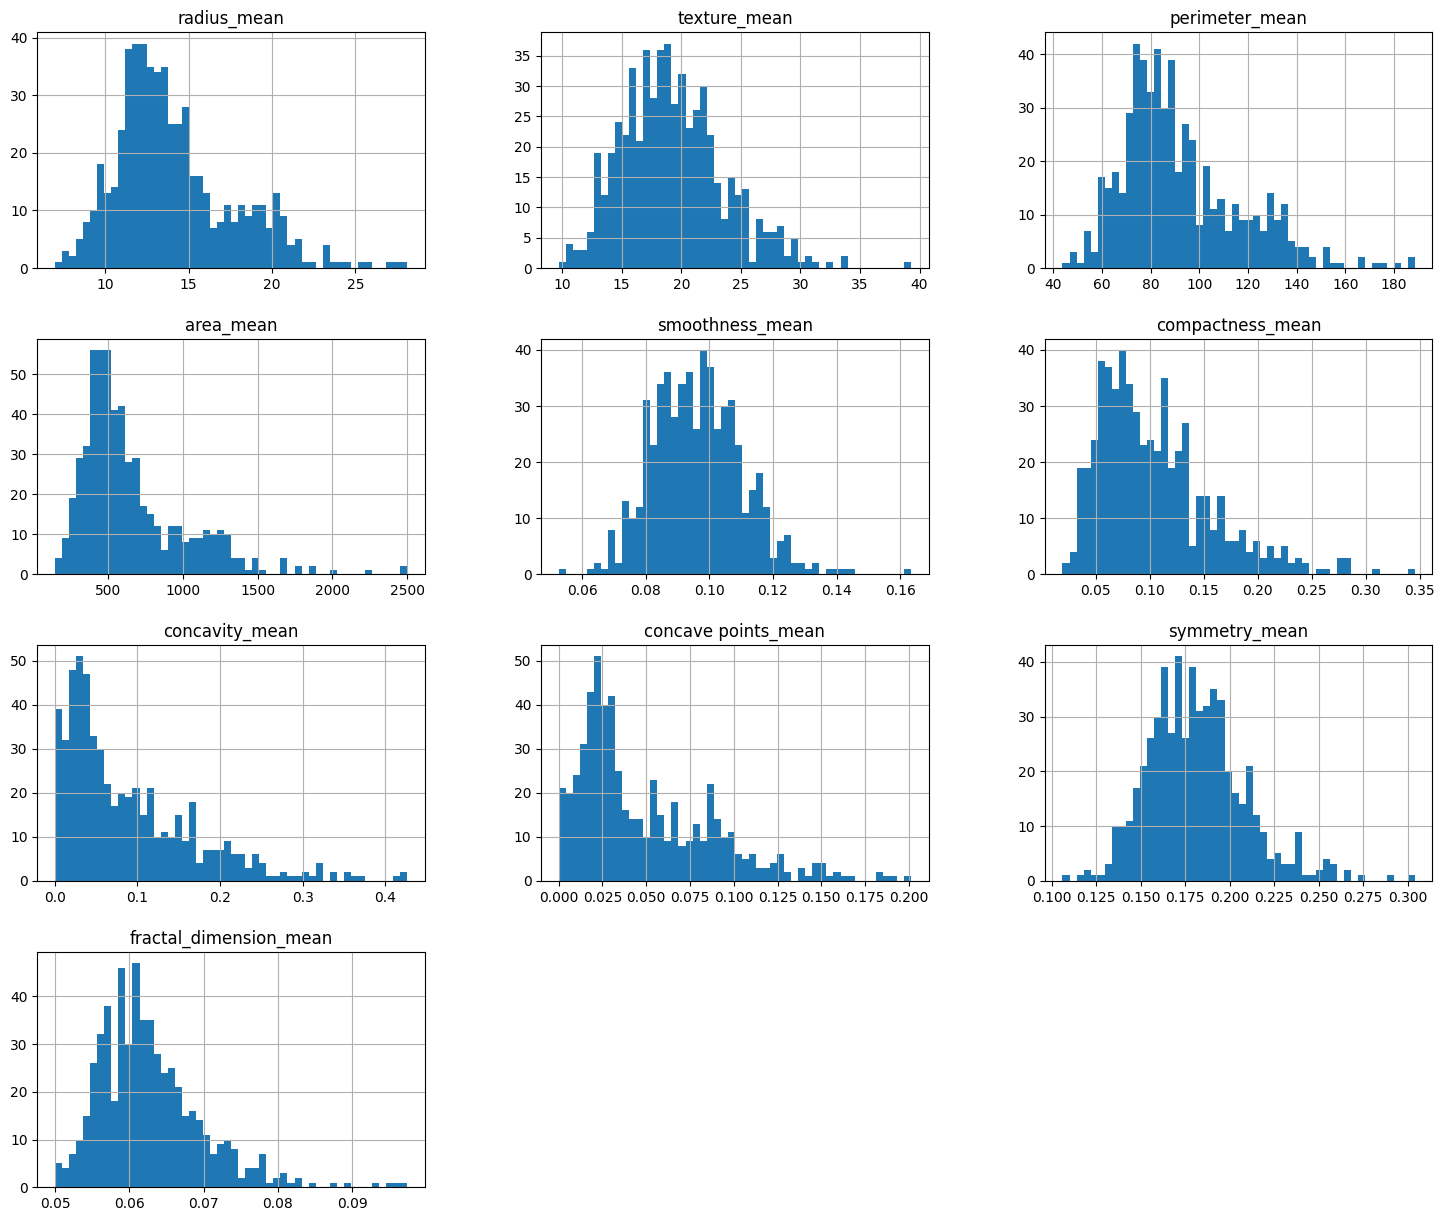

In [77]:
df_mean.hist(figsize=(18,15), bins = 50)
plt.show()

In [78]:
df_mean['area_mean'] = np.log(df_mean['area_mean'])
df_mean['compactness_mean'] = np.log(df_mean['compactness_mean'])

In [79]:
power = PowerTransformer()
df_mean['concavity_mean'] = power.fit_transform(df_mean[['concavity_mean']])
df_mean['concave points_mean'] = power.fit_transform(df_mean[['concave points_mean']])

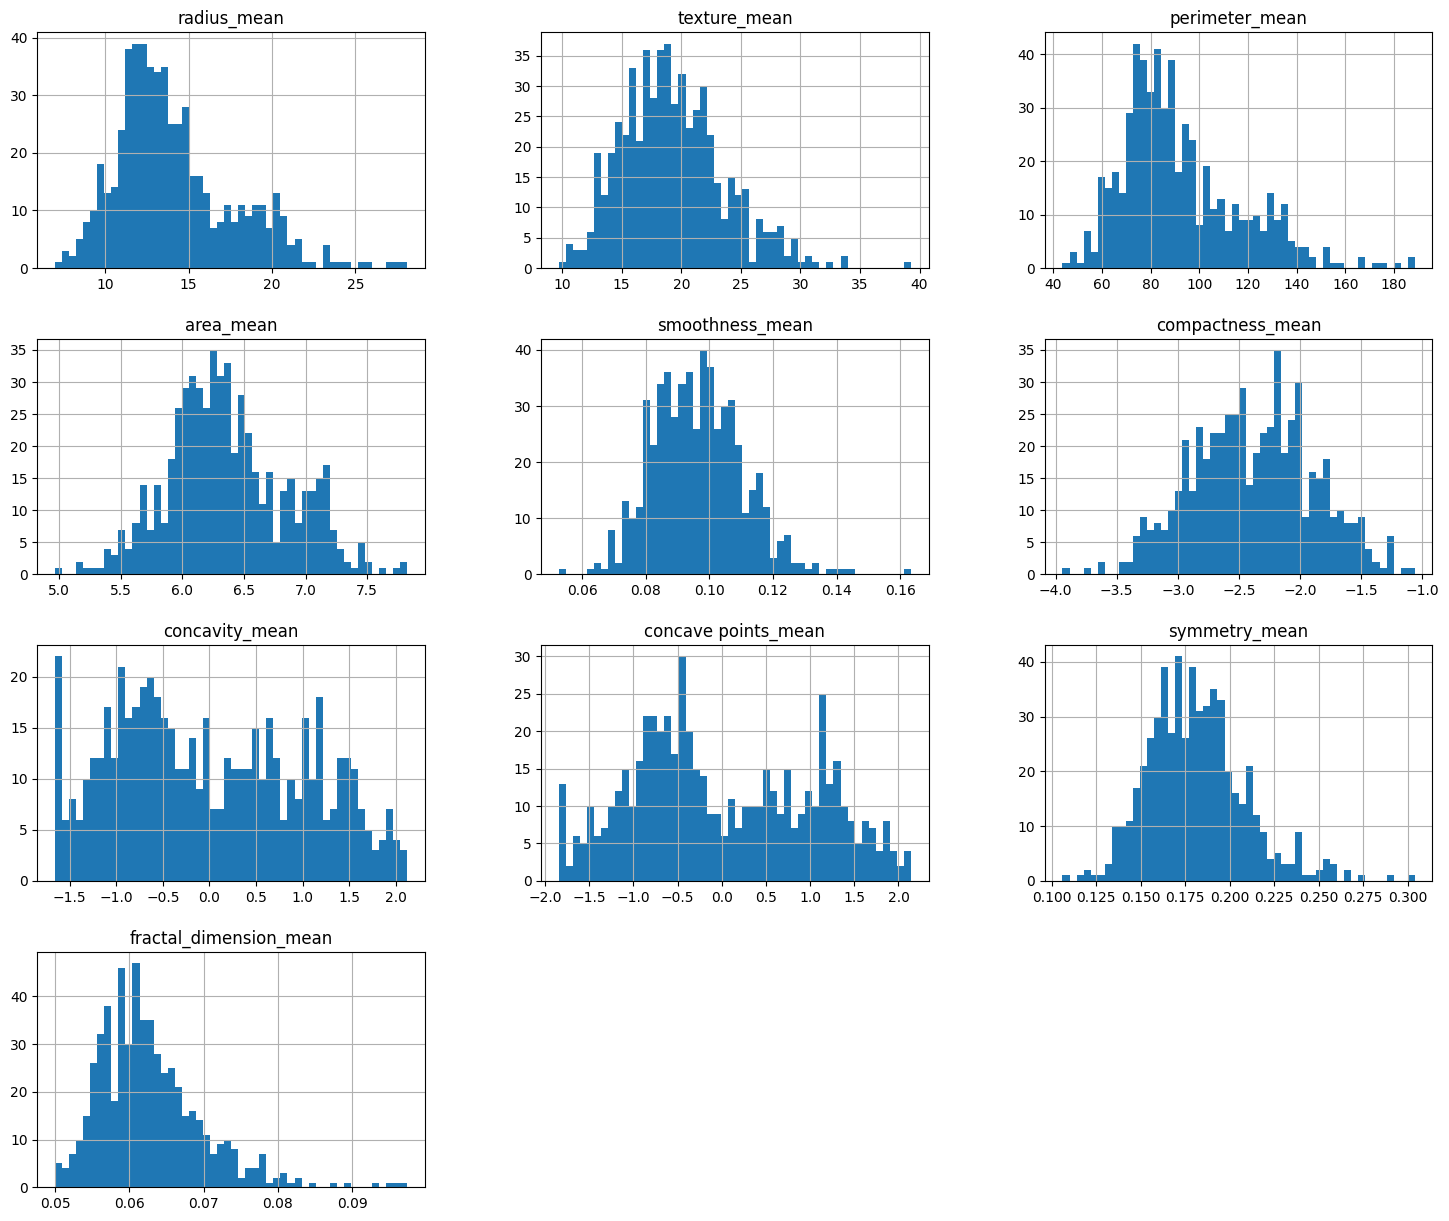

In [80]:
df_mean.hist(figsize=(18,15), bins = 50)
plt.show()

### SQURAED ERROR COLUMNS

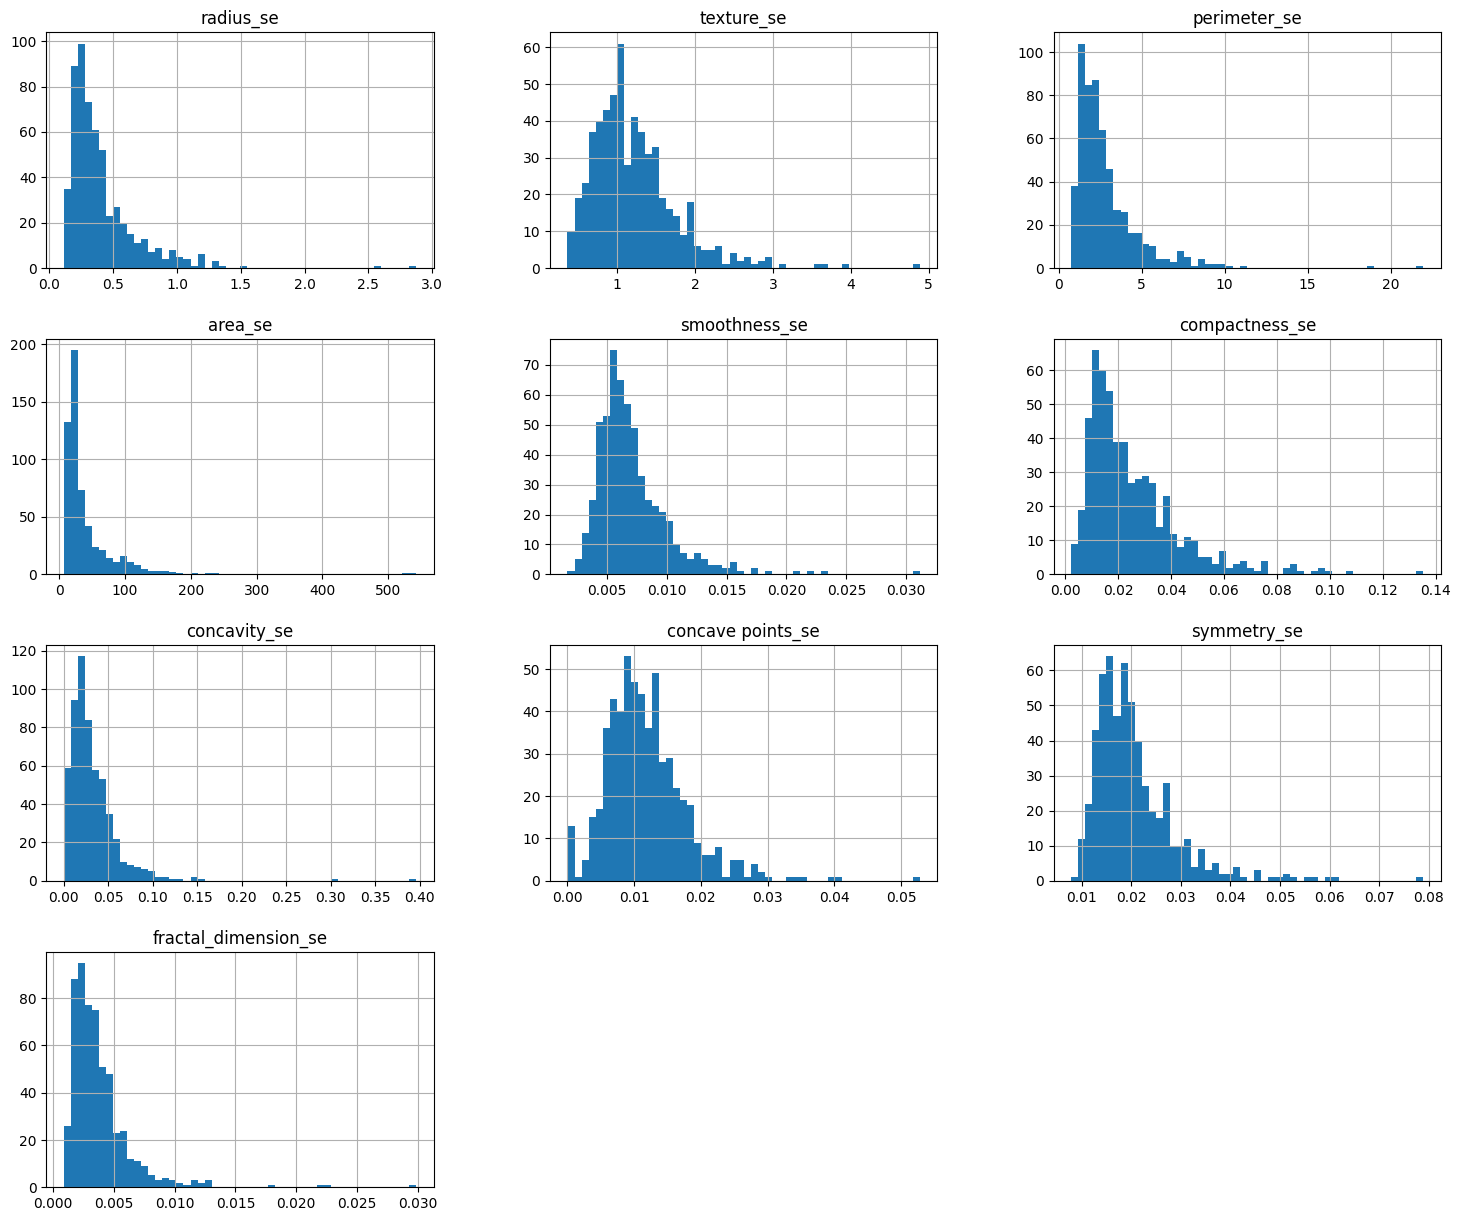

In [81]:
df_se.hist(figsize = (18,15), bins = 50)
plt.show()

In [82]:
for col in df_se.columns:
  if np.min(df_se[col]) != 0:
    df_se[col] = np.log(df_se[col])
  else:
    df_se[col] = power.fit_transform(df_se[[col]])

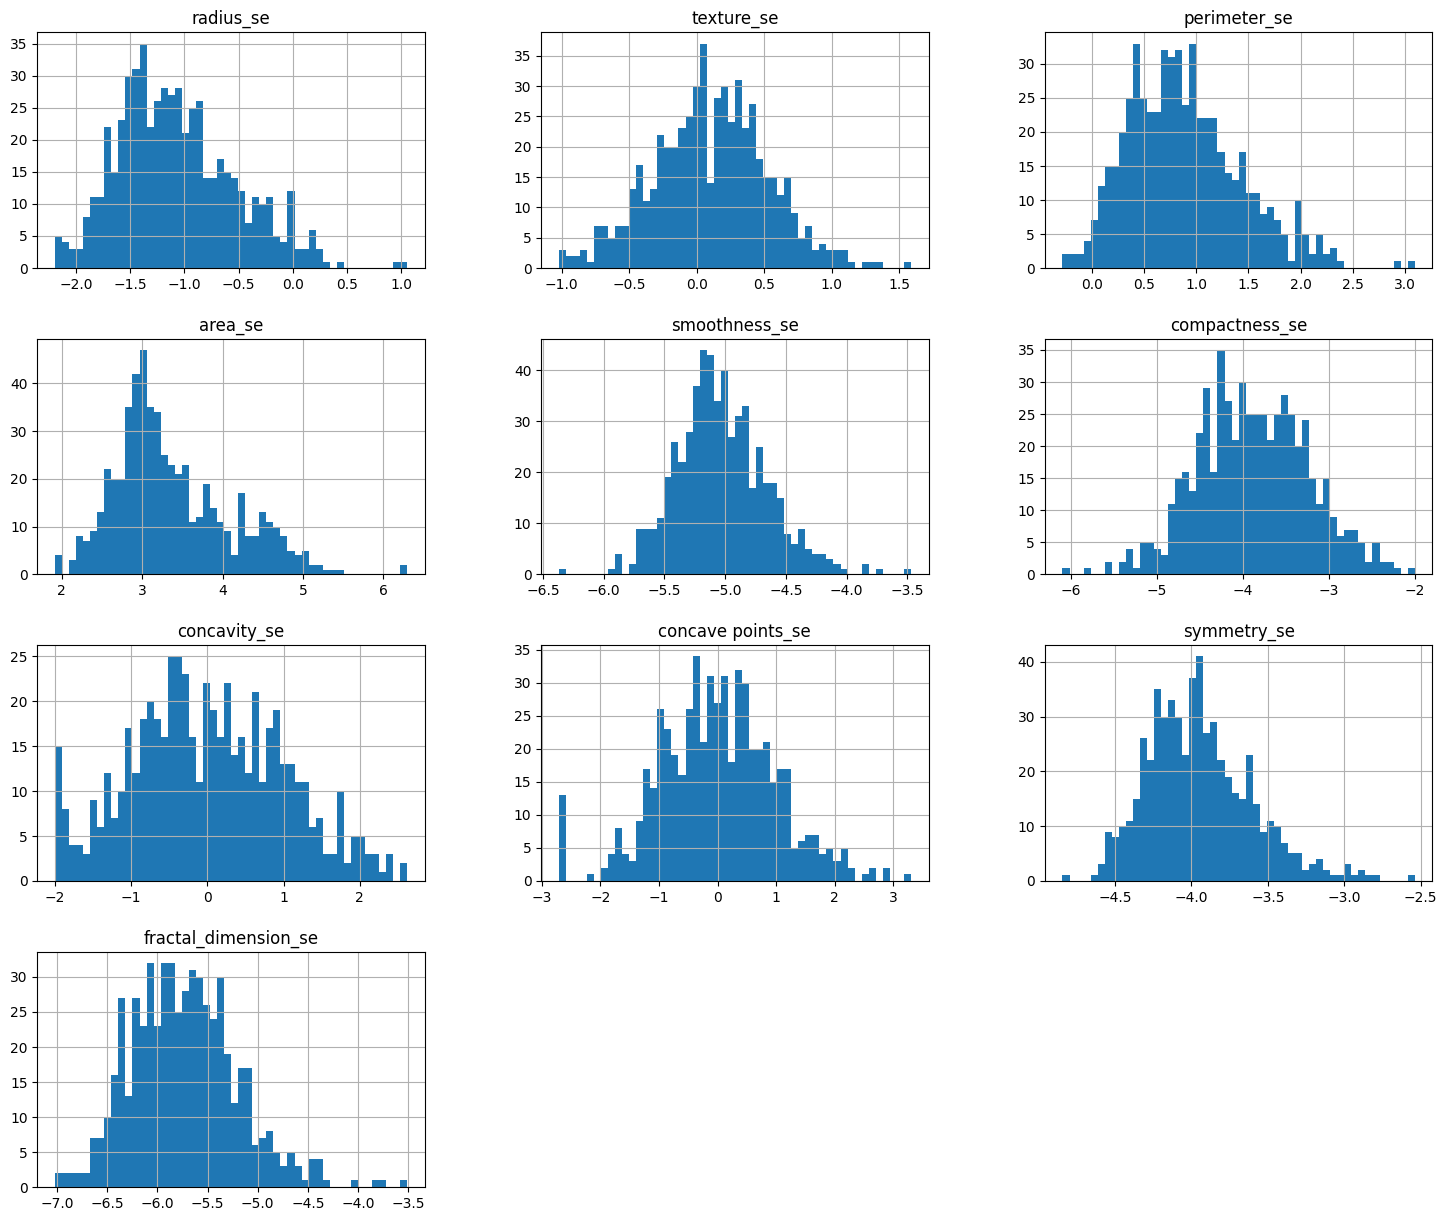

In [83]:
df_se.hist(figsize = (18,15), bins = 50)
plt.show()

### WORST ERROR COLUMNS

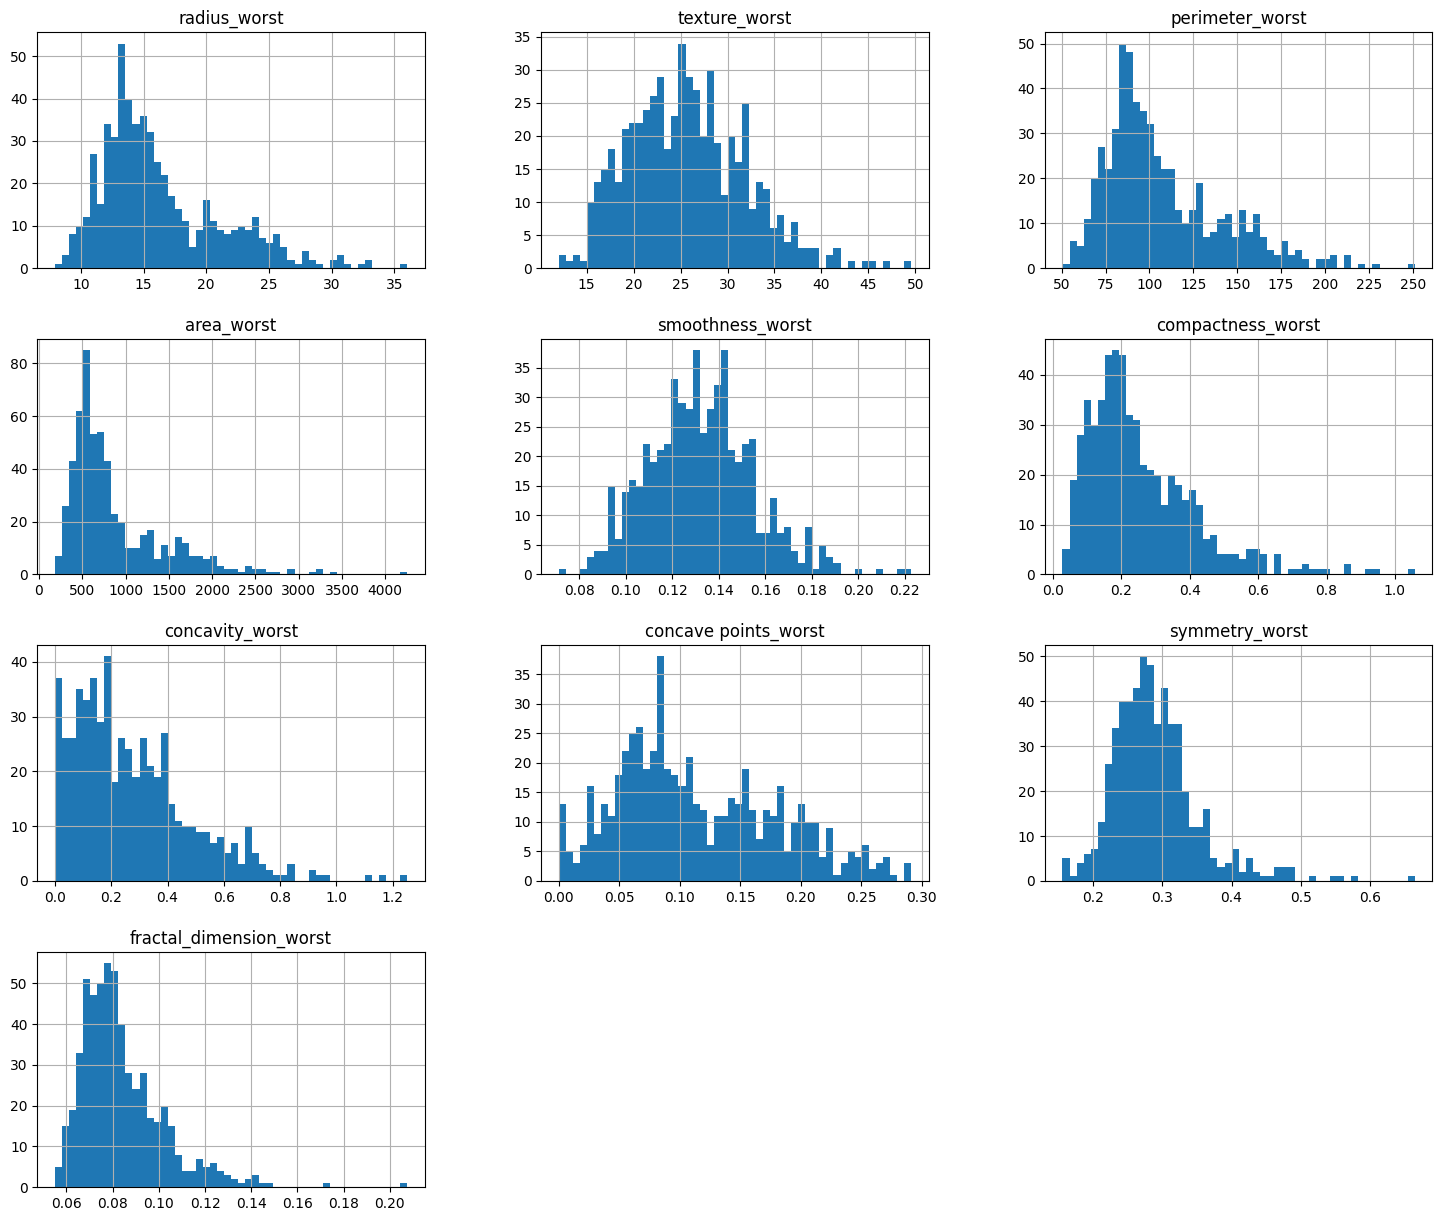

In [84]:
df_worst.hist(figsize = (18,15), bins = 50)
plt.show()

In [85]:
for col in df_worst.columns:
  print(f'{col} ==> {np.min(df_worst[col])}')

radius_worst ==> 7.93
texture_worst ==> 12.02
perimeter_worst ==> 50.41
area_worst ==> 185.2
smoothness_worst ==> 0.07117
compactness_worst ==> 0.02729
concavity_worst ==> 0.0
concave points_worst ==> 0.0
symmetry_worst ==> 0.1565
fractal_dimension_worst ==> 0.05504


In [86]:
df_worst['radius_worst'] = np.log(df_worst['radius_worst'])
df_worst['area_worst'] = np.log(df_worst['area_worst'])
df_worst['compactness_worst'] = np.log(df_worst['compactness_worst'])
df_worst['perimeter_worst'] = np.log(df_worst['perimeter_worst'])

df_worst['symmetry_worst'] = np.sqrt(df_worst['symmetry_worst'])
df_worst['fractal_dimension_worst'] = np.sqrt(df_worst['fractal_dimension_worst'])

df_worst['concavity_worst'] = power.fit_transform(df_worst[['concavity_worst']])
df_worst['concave points_worst'] = power.fit_transform(df_worst[['concave points_worst']])

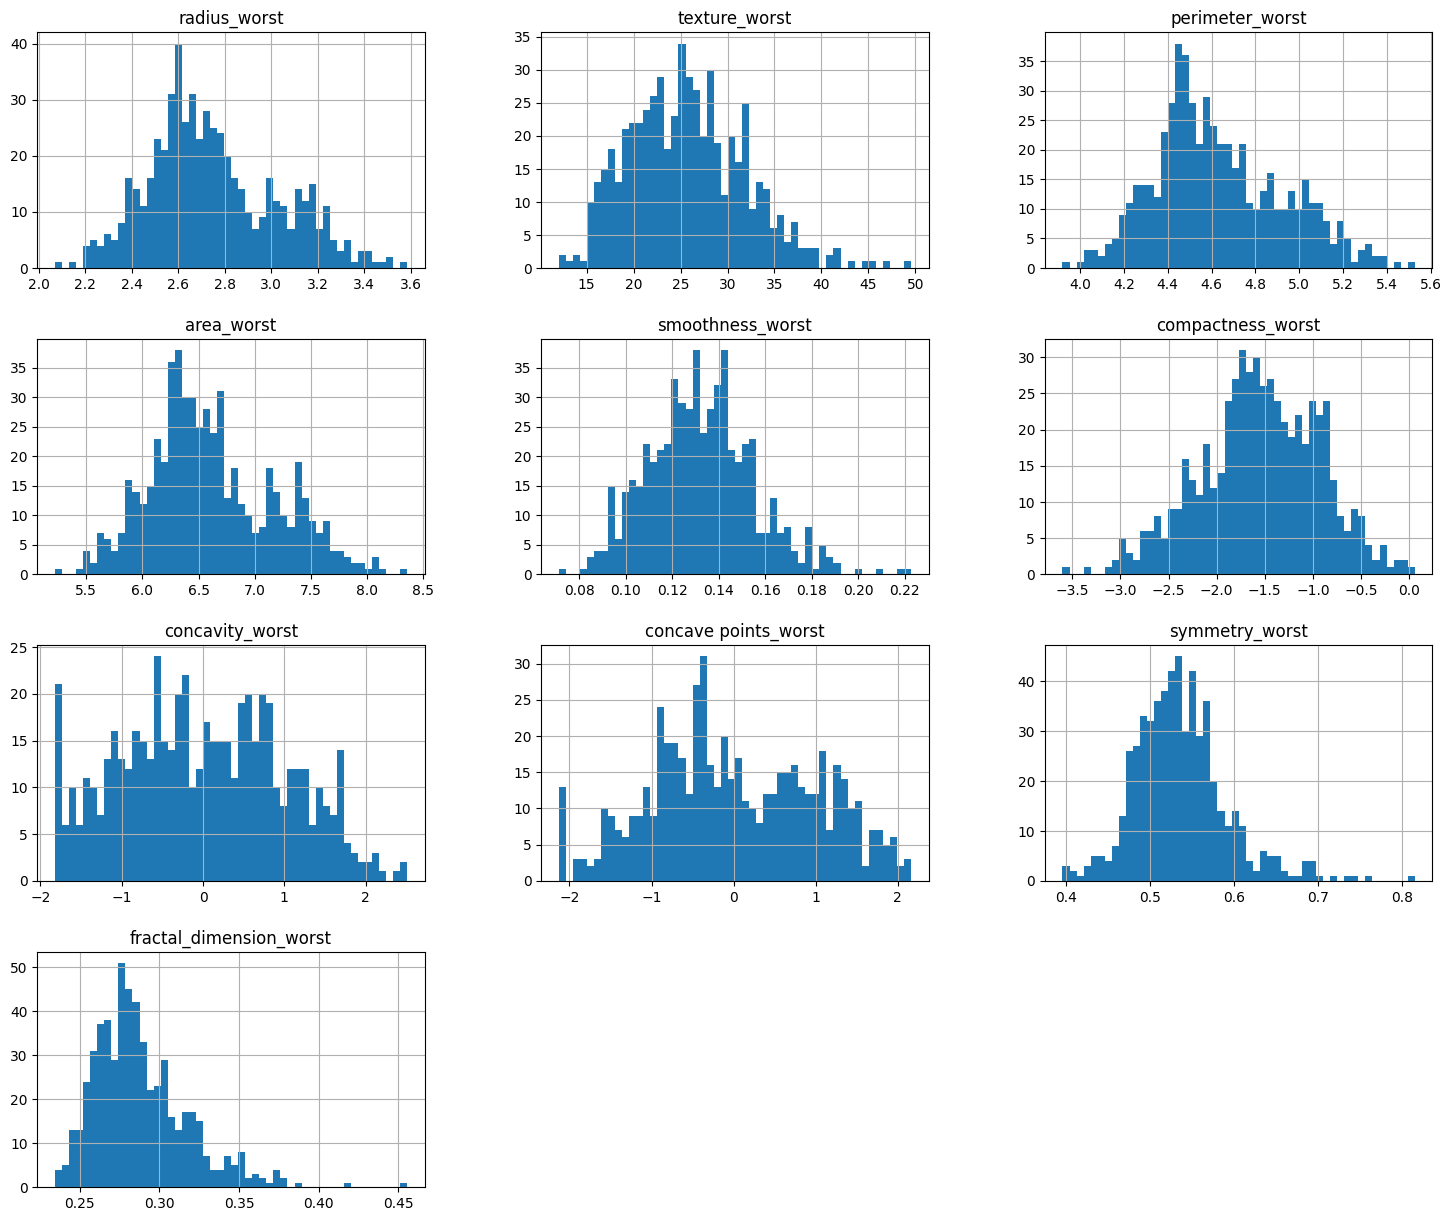

In [87]:
df_worst.hist(figsize = (18,15), bins = 50)
plt.show()

## FEATURES SELECTION


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
print((df_mean < 0).any().any())

True


In [90]:
x = pd.concat([df_mean,df_mean,df_worst], axis = 1)
y = df.diagnosis

print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [91]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [93]:
scale_xtrain = scaler.fit_transform(xtrain)
scale_xtest = scaler.transform(xtest)

In [94]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [95]:
sfs = SFS(RandomForestClassifier(),k_features = 20, forward = True, floating = True, cv = 5)
sfs.fit(scale_xtrain,ytrain)

SequentialFeatureSelector(estimator=RandomForestClassifier(), floating=True,
                          k_features=(20, 20), scoring='accuracy')

In [97]:
train_features = sfs.transform(scale_xtrain)
test_features = sfs.transform(scale_xtest)

# MODEL TRAINING

In [98]:
model_r = RandomForestClassifier()
model = LogisticRegression()

In [99]:
model.fit(train_features,ytrain)

LogisticRegression()

In [100]:
model_r.fit(train_features,ytrain)

RandomForestClassifier()

In [101]:
pred = model.predict(test_features)

In [102]:
pred_r = model_r.predict(test_features)

# EVALUATION

In [103]:
from sklearn.metrics import confusion_matrix, classification_report

In [104]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<Axes: >

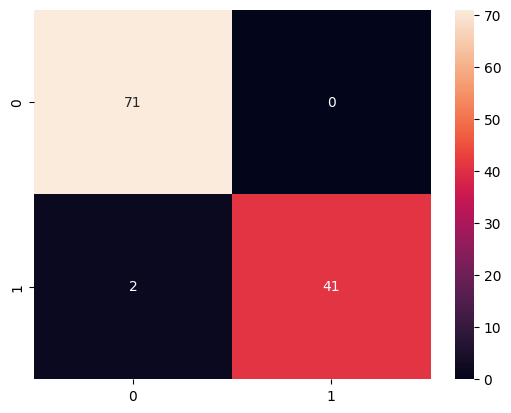

In [107]:
sns.heatmap(confusion_matrix(ytest,pred), annot = True)

In [105]:
print(classification_report(ytest,pred_r))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



<Axes: >

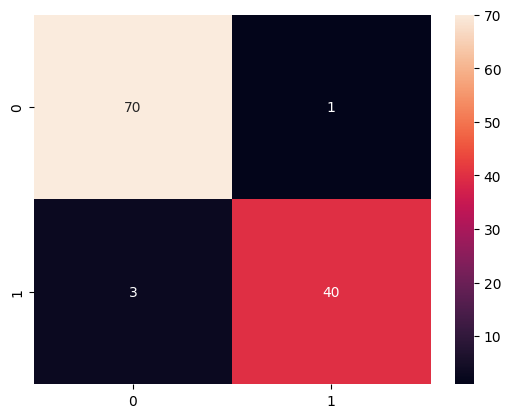

In [108]:
sns.heatmap(confusion_matrix(ytest,pred_r), annot = True)